# BellaBeat - Unlock new business growth opportunity


## Background & Business Question
### 1. Background
BellaBeat, a high-tech company that manufactures health-focused smart products, has grown rapidly and quickly positioned itself as a tech-driven wellness company for women since its foundation in 2013. BellaBeat has been focusing on ditigal marketing such as Google Search, Facebook and Instagram pages, and Twitter.
Now, BellaBeat would like to deep dive into smart device usage data hoping to reveal more business growth opportunities and get high-level recommendations for their marketing strategy.

### 1.1. Business Task
This study seeks to answer the question - how consumers use non-Bellabeat smart devices?

### 1.2. Questions for the analysis
1. What are some trends in smart device usage? <br>
2. How could these trends apply to BellaBeat customers? <br>
3. How could these trends help influence BellaBeat marketing strategy?




## 2. Data Preparation
### 2.1. Source Data
Data set that will be used for this study is: <br>
[FitBit Fitness Tracker Data](https://www.kaggle.com/datasets/arashnic/fitbit) (CC0: Public Domain, dataset made available through [Mobius](https://www.kaggle.com/arashnic)).<br>
This Kaggle data set contains personal fitness tracker from thirty fitbit users. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring, It includes information about daily activity, steps, and heart rate that can be used to explore users' habits.


### 2.2. Import Data

If you do not have kagglehub packages install, download it using below code.

``` python
pip install kagglehub
```

After, download the data set.
``` python
import kagglehub

# Download latest version
path = kagglehub.dataset_download("arashnic/fitbit")

print("Path to dataset files:", path)
```

**The files have been loaded into the specified path.** <br>
There are two separate folders corresponding to different time periods, each containing 18 files. Since the timeline across both folders is continuous,  files in both folders will be used for the analysis.

Each dataset is being opened in Python for further examination.
To determine the most appropriate datasets for analysis, all files will be loaded initially.

In [1]:
import pandas as pd
import os as os

path_1 = path + '\\mturkfitbit_export_3.12.16-4.11.16\\Fitabase Data 3.12.16-4.11.16\\'
path_2 = path + '\\mturkfitbit_export_4.12.16-5.12.16\\Fitabase Data 4.12.16-5.12.16\\'

folders = [path_1, path_2]

# Dictionary to store DataFrames
dataframes = {}

# Loop through each folder 
for folder in folders:
    for filename in os.listdir(folder):
        # get file name by removing trailing _merged.csv
        base_name = filename.replace('_merged.csv', '')
        
        # Full path to the file
        file_path = os.path.join(folder, filename)
        
        # Read the CSV into a Dataframe
        df = pd.read_csv(file_path)
        
        # If a dataframe exists with the same name, concatename two dataframes
        if base_name in dataframes:
            dataframes[base_name] = pd.concat([dataframes[base_name], df], ignore_index=True)
        # If not, add the df to the dataframe
        else: dataframes[base_name] = df
            
            

In [2]:
# View subset of data to see what kind of data is stored in each dataframe
for name, df in dataframes.items():
    print(f'----Data: {name}----')
    
    # Check number of users in the dataset
    n= df['Id'].nunique()
    print('number of users: ', n)
    
    # Look at sample data 
    print(df.head(4))
    
    

----Data: dailyActivity----
number of users:  35
           Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0  1503960366    3/25/2016       11004           7.11             7.11   
1  1503960366    3/26/2016       17609          11.55            11.55   
2  1503960366    3/27/2016       12736           8.53             8.53   
3  1503960366    3/28/2016       13231           8.93             8.93   

   LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                       0.0                2.57                      0.46   
1                       0.0                6.92                      0.73   
2                       0.0                4.66                      0.16   
3                       0.0                3.19                      0.79   

   LightActiveDistance  SedentaryActiveDistance  VeryActiveMinutes  \
0                 4.07                      0.0                 33   
1                 3.91                      0.0       

Based on the observation, We can build the following table.



| File   Name             | Type     | Description                                                                                                                                                             | Numer of users |
|-------------------------|----------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------------|
| weightLogInfo           | csv file | Weight log info. The record could be entered manual. Columns: Id, Date,   Weight(kg & lbs), Fat, BMI, Manual, LogID                                                     | 24             |
| dailyActivity           | csv file | Daily activity tracker for per user. Columns: steps, distance,   distance+intensity, minute+intencity, Calories                                                         | 35             |
| dailyCalories           | csv file | Daily calorie consumption                                                                                                                                               | 35             |
| dailyIntensities        | csv file | The daily intensity data records the time (in minutes) and distance spent   at different intensity levels: Sedentary, Lightly Active, Fairly Active, and   Very Active. | 35             |
| dailySteps              | csv file | Steps taken each day                                                                                                                                                    | 35             |
| heartrate_seconds       | csv file | Heart rate changes for every 5 seconds                                                                                                                                  | 15             |
| hourlyCalories          | csv file | Calorie consumption for every hour                                                                                                                                      | 35             |
| hourlyIntensities       | csv file | Hourly Intensities                                                                                                                                                      | 35             |
| hourlySteps             | csv file | Hourly Steps                                                                                                                                                            | 35             |
| minuteCaloriesNarrow    | csv file | Calorie consumption is recorded per minute, with each value stored in a   separate row.                                                                                 | 35             |
| minuteCaloriesWide      | csv file | Calorie consumption is recorded per minute, with values from the same   hour grouped in a single row across different columns                                           | 35             |
| minuteIntensitiesNarrow | csv file | Intensity level 0-3 recorded per minute                                                                                                                                 | 35             |
| minuteIntensitiesWide   | csv file | Intensity level 0-3 recorded per minute, with each value from the same   hour grouped in a single row across different columns                                          | 35             |
| minuteMETsNarrow        | csv file | Metabolic equivalents is recorded per minute                                                                                                                            | 35             |
| minuteSleep             | csv file | Sleep data per minute. However, it is difficult to identify what the   column [value] means                                                                             | 25             |
| minuteStepsNarrow       | csv file | Number of steps taken per minute, with each value stored in a separate   row.                                                                                           | 33             |
| minuteStepsWide         | csv file | Number of steps taken per minute, with values from the same hour grouped   in a single row across different columns                                                     | 33             |
| sleepDay                | csv file | Daily sleep   logs, tracked by: Total count of sleeps a day, Total minutes, Total Time in   Bed                                                                         | 24             |

### 2.3. Data Credibility & Integrity
The small sample size (ranging from 15 to 35 users) limits the ability to generalize findings to the broader user population. Additionally, the data spans only a two-month period in 2016, which is likely insufficient to capture long-term trends and may not accurately reflect current user behavior or patterns.

### 2.4. Focus

Based on the overview of the datasets, the analysis will focus on the following areas:


1. **Classifying User Engagement Levels**
    - Identify patterns in app usage frequency, activity levels (e.g., step counts), and device wearing habits.
    - Categorize users into engagement tiers (e.g., heavy, medium, light) to inform personalized marketing strategies.
    

2. **Understanding Weight Logging Behavior**
    - Examine how users log weight (manually or automatically) and how frequently.
    - Assess if weight-tracking users show stronger overall app engagement.
    

3. **Exploring Factors that Influence Sleep Quality**
    - Analyze how physical activity levels and device usage relate to sleep efficiency and duration.
    - Evaluate whether the time of day users are most physically active (morning, afternoon, evening, night) correlates with better sleep outcomes.
    - Identify potential behavioral patterns that could inform sleep coaching features.


## 3. Prepare

### 3.1. Dataset Selection
To answer the questions above, we take these dataframes for the analysis:<br>
* weightLogInfo
* dailyActivity
* sleepDay
* hourlyIntensities

In [3]:
df_weightLogInfo = dataframes['weightLogInfo'].copy()
df_dailyActivity = dataframes['dailyActivity'].copy()
df_sleepDay = dataframes['sleepDay'].copy()
df_hourlyIntensities = dataframes['hourlyIntensities'].copy()

### 3.2. Data Cleaning
For data cleaning, I will address the following categories:
* Data Type
* Null 
* Date Range
* Duplicates 

#### 3.2.1. Data Type 

In [4]:
df_weightLogInfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              100 non-null    int64  
 1   Date            100 non-null    object 
 2   WeightKg        100 non-null    float64
 3   WeightPounds    100 non-null    float64
 4   Fat             4 non-null      float64
 5   BMI             100 non-null    float64
 6   IsManualReport  100 non-null    bool   
 7   LogId           100 non-null    int64  
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 5.7+ KB


In [5]:
df_dailyActivity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1397 entries, 0 to 1396
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        1397 non-null   int64  
 1   ActivityDate              1397 non-null   object 
 2   TotalSteps                1397 non-null   int64  
 3   TotalDistance             1397 non-null   float64
 4   TrackerDistance           1397 non-null   float64
 5   LoggedActivitiesDistance  1397 non-null   float64
 6   VeryActiveDistance        1397 non-null   float64
 7   ModeratelyActiveDistance  1397 non-null   float64
 8   LightActiveDistance       1397 non-null   float64
 9   SedentaryActiveDistance   1397 non-null   float64
 10  VeryActiveMinutes         1397 non-null   int64  
 11  FairlyActiveMinutes       1397 non-null   int64  
 12  LightlyActiveMinutes      1397 non-null   int64  
 13  SedentaryMinutes          1397 non-null   int64  
 14  Calories

In [6]:
df_sleepDay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


In [7]:
df_hourlyIntensities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46183 entries, 0 to 46182
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                46183 non-null  int64  
 1   ActivityHour      46183 non-null  object 
 2   TotalIntensity    46183 non-null  int64  
 3   AverageIntensity  46183 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 1.4+ MB


According to the observations above, the followings were discovered:
1. There are inconsistency in column names across different dataframes.
2. DateTime values are being read as objects.
3. The "Fat" column in df_weightLogInfo contains only 4 non-null values out of 100.

To address these issues, we will:
1. Standardize column names across all dataframes.
2. Convert the object columns to the appropriate DateTime data type.
3. Drop the "Fat" column for the analysis, given its high number of null values. Also, I will drop the "TotalSleepRecords" and "LogId" because there is no clear explanation about the data and hard to interpret its meanings.




In [8]:
# Standardize column names across all dataframes
df_dailyActivity = df_dailyActivity.rename(columns = {'ActivityDate': 'Date'})
df_sleepDay = df_sleepDay.rename(columns = {'SleepDay' : 'Date'})
df_hourlyIntensities = df_hourlyIntensities = df_hourlyIntensities.rename(columns = {'ActivityHour' : 'Date'})

In [9]:
# Convert object columns to DateTime
df_weightLogInfo['Date'] = pd.to_datetime(df_weightLogInfo['Date'])
df_dailyActivity['Date'] = pd.to_datetime(df_dailyActivity['Date'])
df_sleepDay['Date'] = pd.to_datetime(df_sleepDay['Date'])
df_hourlyIntensities['Date'] = pd.to_datetime(df_hourlyIntensities['Date'])


In [10]:
# Drop "Fat" Column
df_weightLogInfo.drop('Fat', axis=1, inplace=True)

In [11]:
# Drop "TotalSleepRecords" and "LogId"
df_sleepDay.drop('TotalSleepRecords', axis = 1, inplace = True)
df_weightLogInfo.drop('LogId', axis = 1, inplace = True)

#### 3.2.2. Null

In [12]:
df_weightLogInfo.isnull().sum()

Id                0
Date              0
WeightKg          0
WeightPounds      0
BMI               0
IsManualReport    0
dtype: int64

In [13]:
df_dailyActivity.isnull().sum()

Id                          0
Date                        0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [14]:
df_sleepDay.isnull().sum()

Id                    0
Date                  0
TotalMinutesAsleep    0
TotalTimeInBed        0
dtype: int64

In [15]:
df_hourlyIntensities.isnull().sum()

Id                  0
Date                0
TotalIntensity      0
AverageIntensity    0
dtype: int64

#### 3.2.3 Date Range

In [16]:
print(df_weightLogInfo['Date'].min())
print(df_weightLogInfo['Date'].max())

# Extract just the time (HH:MM:SS)
df_weightLogInfo['Time'] = df_weightLogInfo['Date'].dt.time

# Extract just the date
df_weightLogInfo['Date'] = pd.to_datetime(df_weightLogInfo['Date'].dt.date)


2016-03-30 23:59:59
2016-05-12 23:59:59


In [17]:
print(df_dailyActivity['Date'].min())
print(df_dailyActivity['Date'].max())

2016-03-12 00:00:00
2016-05-12 00:00:00


In [18]:
print(df_sleepDay['Date'].min())
print(df_sleepDay['Date'].max())

2016-04-12 00:00:00
2016-05-12 00:00:00


In [19]:
print(df_hourlyIntensities['Date'].min())
print(df_hourlyIntensities['Date'].max())

# Extract just the time (HH:MM:SS)
df_hourlyIntensities['Time'] = df_hourlyIntensities['Date'].dt.time

# Convert to datetime and extract hour
df_hourlyIntensities['hour'] = pd.to_datetime(df_hourlyIntensities['Time'], format='%H:%M:%S').dt.hour

# Extract just the date
df_hourlyIntensities['Date'] = pd.to_datetime(df_hourlyIntensities['Date'].dt.date)


2016-03-12 00:00:00
2016-05-12 15:00:00


#### 3.2.4. Duplicates

In [20]:
df_weightLogInfo[df_weightLogInfo.duplicated(keep=False)]

,Id,Date,WeightKg,WeightPounds,BMI,IsManualReport,Time
22,6962181067,2016-04-12,62.500000,137.788914,24.389999,True,23:59:59
32,8877689391,2016-04-12,85.800003,189.156628,25.680000,False,06:47:11
46,6962181067,2016-04-12,62.500000,137.788914,24.389999,True,23:59:59
76,8877689391,2016-04-12,85.800003,189.156628,25.680000,False,06:47:11


In [21]:
df_dailyActivity[df_dailyActivity.duplicated(keep=False)]

,Id,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories


In [22]:
df_sleepDay[df_sleepDay.duplicated(keep=False)]

,Id,Date,TotalMinutesAsleep,TotalTimeInBed
160,4388161847,2016-05-05,471,495
161,4388161847,2016-05-05,471,495
222,4702921684,2016-05-07,520,543
223,4702921684,2016-05-07,520,543
379,8378563200,2016-04-25,388,402
380,8378563200,2016-04-25,388,402


In [23]:
df_hourlyIntensities[df_hourlyIntensities.duplicated(keep=False)]

,Id,Date,TotalIntensity,AverageIntensity,Time,hour
1488,1624580081,2016-04-12,4,0.066667,00:00:00,0
1489,1624580081,2016-04-12,1,0.016667,01:00:00,1
1490,1624580081,2016-04-12,0,0.000000,02:00:00,2
1491,1624580081,2016-04-12,1,0.016667,03:00:00,3
1492,1624580081,2016-04-12,0,0.000000,04:00:00,4
...,...,...,...,...,...,...
45452,8877689391,2016-04-12,0,0.000000,04:00:00,4
45453,8877689391,2016-04-12,0,0.000000,05:00:00,5
45454,8877689391,2016-04-12,7,0.116667,06:00:00,6
45455,8877689391,2016-04-12,26,0.433333,07:00:00,7


It appears that df_weightLogInfom df_sleepDay, and df_hourlyIntensities have duplicated rows. <br>
I will drop the duplicates.

In [24]:
# Drop duplicates
df_weightLogInfo.drop_duplicates(inplace=True)
df_sleepDay.drop_duplicates(inplace=True)
df_hourlyIntensities.drop_duplicates(inplace=True)

## 4. Analysis
To support BellaBeat's marketing strategy, we examine activity trends among FitBit users. Specifically, we classify users based on their average daily steps, which is a key indicator of overall physical activity.

### 4.1. Classifying Users by Daily Step Count

Users are categorized by the average number of steps taken per day:

- **Sedentary**: Fewer than 5,000 steps per day  
- **Lightly active**: 5,000 to 7,499 steps per day  
- **Fairly active**: 7,500 to 9,999 steps per day  
- **Very active**: 10,000 steps or more per day  

Reference: The classification is based on the following article:[Counting Your Steps](https://www.10000steps.org.au/learn-and-discover/counting-steps/)

In [25]:
import numpy as np 
user_steps  = df_dailyActivity.groupby('Id')['TotalSteps'].mean().reset_index(name = 'avg_daily_steps')

In [26]:
# Define classification conditions
step_bins = [
    user_steps['avg_daily_steps'] < 5000,
    (user_steps['avg_daily_steps'] >= 5000) & (user_steps['avg_daily_steps'] < 7500),
    (user_steps['avg_daily_steps'] >= 7500) & (user_steps['avg_daily_steps'] < 10000),
    user_steps['avg_daily_steps'] >= 10000
]

step_labels = ['Sedentary', 'Lightly Active', 'Fairly Active', 'Very Active']

# Assign user type
user_steps['activity_level'] = np.select(step_bins, step_labels, default=np.nan)

In [27]:
user_steps.head()

,Id,avg_daily_steps,activity_level
0,1503960366,11935.780000,Very Active
1,1624580081,5167.200000,Lightly Active
2,1644430081,7780.925000,Fairly Active
3,1844505072,2876.023256,Sedentary
4,1927972279,1269.069767,Sedentary


Now, let's see users' distribution.

In [28]:
# Count users by activity level
activity_distribution = user_steps['activity_level'].value_counts().reset_index()
activity_distribution.columns = ['activity_level', 'user_count']

# Sort for visualization
activity_distribution = activity_distribution.sort_values(by='user_count', ascending=False)

In [29]:
activity_distribution

,activity_level,user_count
0,Sedentary,13
1,Fairly Active,8
2,Very Active,7
3,Lightly Active,7


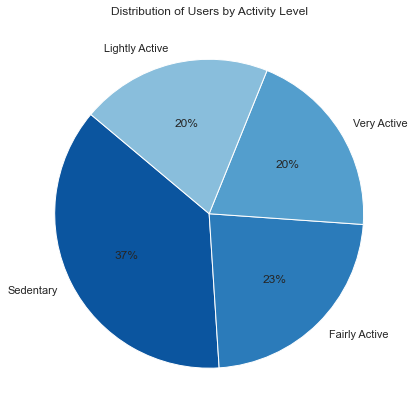

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# define Seaborn color palette to use
colors = sns.color_palette('Blues_r')

# plotting data on chart
plt.figure(figsize=(6, 6))
plt.pie(activity_distribution['user_count'],
        labels=activity_distribution['activity_level'],
        colors=colors,
        autopct='%.0f%%',
        startangle=140)

plt.title('Distribution of Users by Activity Level')
plt.tight_layout()
plt.show()

Approximately 37% of users are sedentary, while 63% are at least lightly active. Although not the majority, the sedentary group is still the largest single category, presenting a valuable audience for BellaBeat to engage with motivational or goal-based health features.

### 4.2. Classifying Users by App Engagement

User app usage levels are determined based on the number of recorded activities within the specified date ranges.

The data covers two time periods:
- March 12 to April 11
- April 12 to May 11

Each user’s usage baseline is determined as follows:

- 30 days if activity is logged in only one of the two periods

- 60 days if activity spans both periods

**User Engagement Categories**

- Light user: Active on < 50% of days  
- Medium user: Active on 50% to < 80% of days  
- Heavy user: Active on ≥ 80% of days  

In [31]:
# Calculate user-level usage stats
user_engagement = df_dailyActivity.groupby('Id').agg(
    start_date=('Date', 'min'),
    end_date=('Date', 'max'),
    active_days=('Date', 'nunique')
).reset_index()

In [32]:
# Assign baseline based on coverage
user_engagement['baseline_days'] = np.where(
    (user_engagement['start_date'] < '2016-04-12') & (user_engagement['end_date'] > '2016-04-11'),
    60, 30
)


In [33]:
# Calculate usage ratio and assign category
user_engagement['usage_ratio'] = user_engagement['active_days'] / user_engagement['baseline_days']

conditions = [
    user_engagement['usage_ratio'] >= 0.8,
    (user_engagement['usage_ratio'] >= 0.5) & (user_engagement['usage_ratio'] < 0.8),
    user_engagement['usage_ratio'] < 0.5
]
labels = ['Heavy User', 'Medium User', 'Light User']

user_engagement['usage_category'] = np.select(conditions, labels)

In [34]:
# Count users per category
usage_summary = user_engagement.groupby('usage_category')['Id'].count().reset_index(name='user_count')
usage_summary = usage_summary.sort_values(by='user_count', ascending=False)

In [35]:
usage_summary

,usage_category,user_count
2,Medium User,30
0,Heavy User,3
1,Light User,2


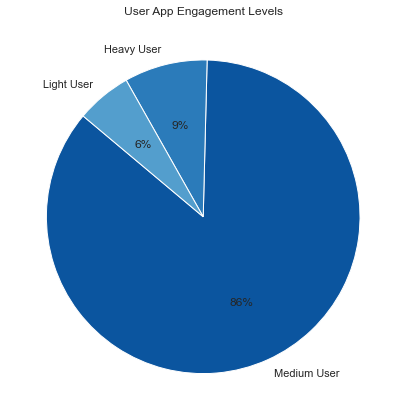

In [36]:
# plotting data on chart
plt.figure(figsize=(6, 6))
plt.pie(usage_summary['user_count'],
        labels=usage_summary['usage_category'],
        colors=colors,
        autopct='%.0f%%',
        startangle=140)

plt.title('User App Engagement Levels')
plt.tight_layout()
plt.show()

The majority of users (30 out of 35) fall under the medium usage category.
Only 3 users are classified as heavy users, and 2 users are light users.

This suggests that while users are regularly engaging with the app, there’s a substantial opportunity to convert medium users into heavy users by encouraging more consistent daily activity logging.

### 4.3. Classifying Users by Daily Device Wearing Time
To better understand how frequently users wear their devices throughout the day, we calculate the average total wearing time for each user. This insight helps identify user engagement beyond app usage, shedding light on whether users are passively wearing the device for health monitoring.

**How Wearing Time is Calculated** <br/>
Total daily wearing time is approximated as the sum of: [VeryActiveMinutes], [FairlyActiveMinutes], [LightlyActiveMinutes], [SedentaryMinutes]

This gives us the total minutes the device was worn per day.

In [37]:
# Calculate total wearing time per day
df_dailyActivity['TotalWearingTime'] = (
    df_dailyActivity['VeryActiveMinutes'] +
    df_dailyActivity['FairlyActiveMinutes'] +
    df_dailyActivity['LightlyActiveMinutes'] +
    df_dailyActivity['SedentaryMinutes']
)

# Compute average daily wearing time per user
user_wearing_time = df_dailyActivity.groupby('Id')['TotalWearingTime'].mean().reset_index(name='avg_wearing_time')

# Convert to percentage of total minutes in a day (1,440)
user_wearing_time['pct_of_day_worn'] = user_wearing_time['avg_wearing_time'] / 1440

In [38]:
# Categorize users based on device usage time
conditions = [
    user_wearing_time['pct_of_day_worn'] < 0.5,
    (user_wearing_time['pct_of_day_worn'] >= 0.5) & (user_wearing_time['pct_of_day_worn'] < 0.8),
    user_wearing_time['pct_of_day_worn'] >= 0.8
]

labels = ['Worn Less Than Half Day', 'Worn More Than Half Day', 'Worn All Day']

user_wearing_time['wearing_category'] = np.select(conditions, labels)

In [39]:
user_wearing_time.head()

,Id,avg_wearing_time,pct_of_day_worn,wearing_category
0,1503960366,1112.200000,0.772361,Worn More Than Half Day
1,1624580081,1416.200000,0.983472,Worn All Day
2,1644430081,1358.500000,0.943403,Worn All Day
3,1844505072,1287.720930,0.894251,Worn All Day
4,1927972279,1276.651163,0.886563,Worn All Day


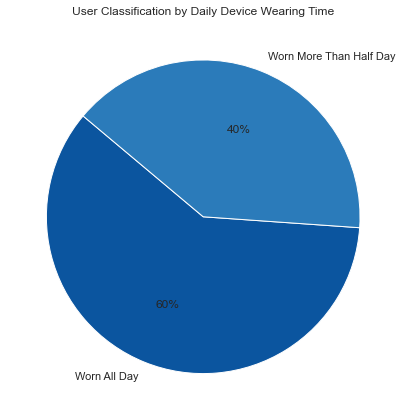

In [40]:
#  Count users per wearing time category
wearing_summary = user_wearing_time.groupby('wearing_category')['Id'].count().reset_index(name='user_count')
wearing_summary = wearing_summary.sort_values(by='user_count', ascending=False)

# Use the same Seaborn color palette
plt.figure(figsize=(6, 6))
plt.pie(wearing_summary['user_count'],
        labels=wearing_summary['wearing_category'],
        colors=colors,
        autopct='%.0f%%',
        startangle=140)

plt.title('User Classification by Daily Device Wearing Time')
plt.tight_layout()
plt.show()

The majority of users wore their device for more than half the day, with a notable portion wearing it all day. <br>
This indicates high trust in the device for passive tracking and provides BellaBeat with an opportunity to further leverage passive features like like sleep tracking, heart rate monitoring, and sedentary alerts.



### 4.4.  Consolidated User Classification and Correlation Analysis
In this section, we integrate all user-level data(app engagement, daily step count, and device wearing time) to understand how different usage dimensions relate to each other. This comprehensive view allows us to identify potential user segments and behavioral patterns that can inform BellaBeat’s product design and marketing strategies.


In [41]:
user_profiles = user_engagement[['Id', 'usage_category', 'usage_ratio']] \
    .merge(user_steps[['Id', 'activity_level', 'avg_daily_steps']], on='Id', how='outer') \
    .merge(user_wearing_time[['Id', 'wearing_category', 'pct_of_day_worn']], on='Id', how='outer')

**Correlation Analysis** <br/>
We assess the relationships between app engagement, physical activity, and device wearing time.

1. App Engagement vs. Physical Activity

In [42]:
correlation = user_profiles['usage_ratio'].corr(user_profiles['avg_daily_steps'])
print(f"Correlation between usage_ratio and avg_daily_steps: {correlation:.3f}")

Correlation between usage_ratio and avg_daily_steps: 0.297


Correlation: 0.297
This indicates a weak positive correlation — users who log activity more consistently tend to take more daily steps. However, the strength is low, suggesting other factors may influence step count.

2. App Engagement vs. Device Wearing Time

In [43]:
correlation = user_profiles['usage_ratio'].corr(user_profiles['pct_of_day_worn'])
print(f"Correlation between usage_ratio and pct_of_day_worn: {correlation:.3f}")

Correlation between usage_ratio and pct_of_day_worn: -0.211


Correlation: -0.211
There is a weak negative correlation — users who frequently log activity in the app might not wear the device all day. This could imply reliance on manual logging rather than passive tracking.

3. Physical Activity vs. Device Wearing Time

In [44]:
correlation = user_profiles['avg_daily_steps'].corr(user_profiles['pct_of_day_worn'])
print(f"Correlation between avg_daily_steps and pct_of_day_worn: {correlation:.3f}")

Correlation between avg_daily_steps and pct_of_day_worn: -0.164


Correlation: -0.164
A slight negative correlation suggests that wearing the device longer doesn’t necessarily equate to higher physical activity. Some users may be sedentary even while wearing the tracker.

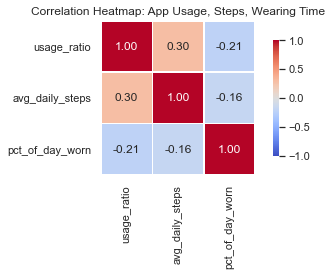

In [45]:
# Compute the correlation matrix
corr_matrix = user_profiles[['usage_ratio', 'avg_daily_steps', 'pct_of_day_worn']].corr()

# Create the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix,
            annot=True,          # show correlation values
            fmt='.2f',           # format as float with 2 decimals
            cmap='coolwarm',     # diverging color scheme
            vmin=-1, vmax=1,     # fix scale for consistency
            square=True,         # make it square
            linewidths=0.5,      # grid lines between cells
            cbar_kws={"shrink": 0.75})  # smaller color bar

plt.title('Correlation Heatmap: App Usage, Steps, Wearing Time')
plt.tight_layout()
plt.show()

### 4.5. Classifying Weight Logging Behavior
This section explores how users interact with the weight logging feature — specifically, whether logs are manual or automatic, how consistently users record their weight, and what that might reveal about engagement or friction points in the app.

**Manual vs Automatic Entries** <br>
Each user's weight logs are either manually entered or automatically uploaded. By grouping entries by user (Id) and counting the number of unique IsManualReport values, we observe that:

In [46]:
df_weightLogInfo.groupby('Id')['IsManualReport'].nunique()

Id
1503960366    1
1927972279    1
2347167796    1
2873212765    1
2891001357    1
4319703577    1
4445114986    1
4558609924    1
4702921684    1
5577150313    1
6962181067    1
8253242879    1
8877689391    1
Name: IsManualReport, dtype: int64

All users are consistent — if a user starts logging manually or automatically, they continue doing so without switching.

Next, we check how many users rely on manual entry:

In [47]:
# Manually logging users
manual_users = df_weightLogInfo[df_weightLogInfo['IsManualReport'] == True]['Id'].nunique()
print(f"Number of users who logged the weight manually: {manual_users}")

# Automatically logging users
auto_users = df_weightLogInfo[df_weightLogInfo['IsManualReport'] == False]['Id'].nunique()
print(f"Number of users who logged the weight automatically: {auto_users}")


Number of users who logged the weight manually: 10
Number of users who logged the weight automatically: 3


10 out of 13 users (77%) manually log their weight, suggesting that automatic syncing may not be widely adopted or understood.

**Logging Days of the Week**<br>
We analyze which days users tend to log their weight:

In [48]:
df_weightLogInfo['Day'] = df_weightLogInfo['Date'].dt.day_name()
df_weightLogInfo.groupby('Day').size().sort_values(ascending=False)


Day
Wednesday    17
Monday       17
Thursday     16
Sunday       14
Tuesday      13
Friday       11
Saturday     10
dtype: int64

Logs are fairly evenly distributed across weekdays, with Monday and Wednesday being slightly more common logging days. This might align with weekly goal-setting or routine check-ins.

**Logging Frequency (Gaps Between Logs)** <br>
To assess how regularly users update their weight, we calculate the average number of days between each user's entries:

In [49]:
temp2 = df_weightLogInfo.copy()
temp2 = temp2.sort_values(by=['Id', 'Date'])
temp2['prev_date'] = temp2.groupby('Id')['Date'].shift(1)
temp2['date_diff'] = (temp2['Date'] - temp2['prev_date']).dt.days.fillna(0)

avg_gap = temp2.groupby('Id')['date_diff'].mean().reset_index()
avg_gap['rounded_gap'] = avg_gap['date_diff'].apply(lambda x: round(x))

gap_distribution = avg_gap.groupby('rounded_gap')['Id'].count().reset_index(name='user_count')


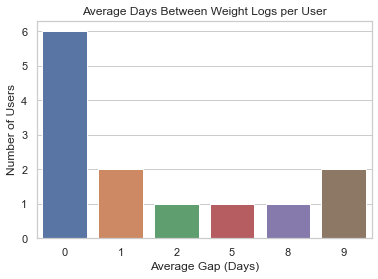

In [50]:
sns.barplot(x='rounded_gap', y='user_count', data=gap_distribution)
plt.title('Average Days Between Weight Logs per User')
plt.xlabel('Average Gap (Days)')
plt.ylabel('Number of Users')
plt.show()

About 6 users logged weight only once, and a few others showed short bursts of activity. This pattern suggests low retention or a testing-only behavior for many users.

### 4.6. Classifying Correlationship Between Sleep Quality and Activity Level
This section investigates whether a user’s physical activity level is associated with their sleep efficiency or sleep duration.

**Defining Sleep Quality Metrics** <br>
We use the following criteria to evaluate user sleep quality:

Sleep Efficiency: Defined as TotalMinutesAsleep / TotalTimeInBed. <br>
* If average sleep efficiency ≥ 85%, it's considered good. <br>
Reference: [How is sleep quality calculated](https://www.sleepfoundation.org/sleep-hygiene/how-is-sleep-quality-calculated)

Sleep Duration:
Converted to hours.
Users are categorized as:

* Undersleeping: < 7 hours

* Sleeping well: 7–9 hours

* Oversleeping: > 9 hours <br>
Reference: [NHLBI - How much sleep](https://www.nhlbi.nih.gov/health/sleep/how-much-sleep)

In [51]:
# Calcaulte sleep efficiency
df_sleepDay['sleepEfficiency'] = df_sleepDay['TotalMinutesAsleep']/df_sleepDay['TotalTimeInBed']

# Aggregate average sleep efficiency and duration per user
user_sleep_quality = df_sleepDay.groupby('Id').agg(
    sleepEfficiency = ('sleepEfficiency', 'mean'),
    sleepingHours = ('TotalMinutesAsleep', 'mean')
).reset_index()

# Convert sleep duration to hours
user_sleep_quality['sleepingHours'] = (user_sleep_quality['sleepingHours']/60).astype(int)

# Categorize sleep efficiency
user_sleep_quality['sleepEfficiency_category'] = np.where(user_sleep_quality['sleepEfficiency'] < 0.85, \
                                                          'low sleep efficiency', \
                                                          'good sleep efficiency')

In [52]:
# Categorize sleep duration
col = 'sleepingHours'
conditions = [user_sleep_quality[col] < 7, \
              (user_sleep_quality[col] >= 7) & (user_sleep_quality[col] <= 9), 
              user_sleep_quality[col] > 9\
             ]
label = ['undersleeping', 'sleeping well', 'oversleeping']

user_sleep_quality['sleepingHours_category'] = np.select(conditions, label)

In [53]:
# Now merge with user profiles
user_profiles = user_profiles.merge(user_sleep_quality, how = 'left', on = 'Id')

In [54]:
user_profiles.head()

,Id,usage_category,usage_ratio,activity_level,avg_daily_steps,wearing_category,pct_of_day_worn,sleepEfficiency,sleepingHours,sleepEfficiency_category,sleepingHours_category
0,1503960366,Heavy User,0.816667,Very Active,11935.780000,Worn More Than Half Day,0.772361,0.936385,6.0,good sleep efficiency,undersleeping
1,1624580081,Heavy User,0.816667,Lightly Active,5167.200000,Worn All Day,0.983472,NaN,NaN,NaN,NaN
2,1644430081,Medium User,0.666667,Fairly Active,7780.925000,Worn All Day,0.943403,0.882040,4.0,good sleep efficiency,undersleeping
3,1844505072,Medium User,0.700000,Sedentary,2876.023256,Worn All Day,0.894251,0.678460,10.0,low sleep efficiency,oversleeping
4,1927972279,Medium User,0.700000,Sedentary,1269.069767,Worn All Day,0.886563,0.947008,6.0,good sleep efficiency,undersleeping


In [55]:
# Count number of users in each sleep-efficiency category
user_profiles_sleep_efficiency_summary = user_profiles.groupby(['activity_level', 'sleepEfficiency_category'])['Id'].size().reset_index()

In [56]:
user_profiles_sleep_efficiency_summary.head()

,activity_level,sleepEfficiency_category,Id
0,Fairly Active,good sleep efficiency,8
1,Lightly Active,good sleep efficiency,3
2,Sedentary,good sleep efficiency,7
3,Sedentary,low sleep efficiency,1
4,Very Active,good sleep efficiency,4


**Sleep Efficiency vs. Activity Level**

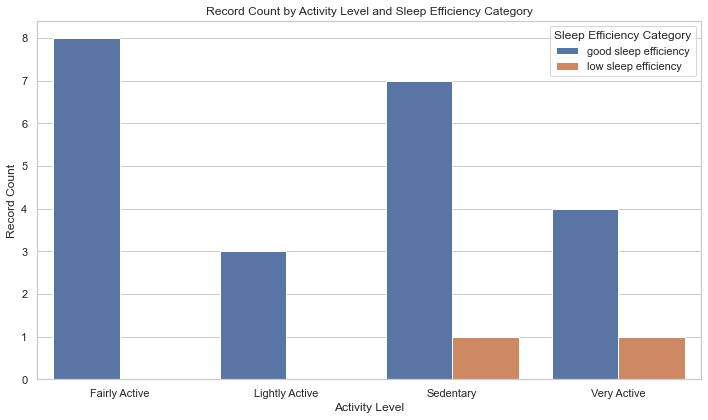

In [57]:
# Set plot style
sns.set(style="whitegrid")

# Plot count of combinations
plt.figure(figsize=(10, 6))
sns.barplot(data=user_profiles_sleep_efficiency_summary, x='activity_level', hue='sleepEfficiency_category', y= 'Id')

# Titles and labels
plt.title('Record Count by Activity Level and Sleep Efficiency Category')
plt.xlabel('Activity Level')
plt.ylabel('Record Count')
plt.legend(title='Sleep Efficiency Category')
plt.tight_layout()

plt.show()

Most users, across all activity levels, achieve good sleep efficiency. <br/>
Only 2 users show low sleep efficiency, so there's no clear pattern suggesting activity level affects sleep efficiency.

In [58]:
# Count number of users in each number of sleeping hours category
user_profiles_sleep_quantity_summary = user_profiles.groupby(['activity_level', 'sleepingHours_category'])['Id'].size().reset_index()

In [59]:
user_profiles_sleep_quantity_summary.head()

,activity_level,sleepingHours_category,Id
0,Fairly Active,sleeping well,5
1,Fairly Active,undersleeping,3
2,Lightly Active,sleeping well,2
3,Lightly Active,undersleeping,1
4,Sedentary,oversleeping,1


**Sleep Duration vs. Activity Level**

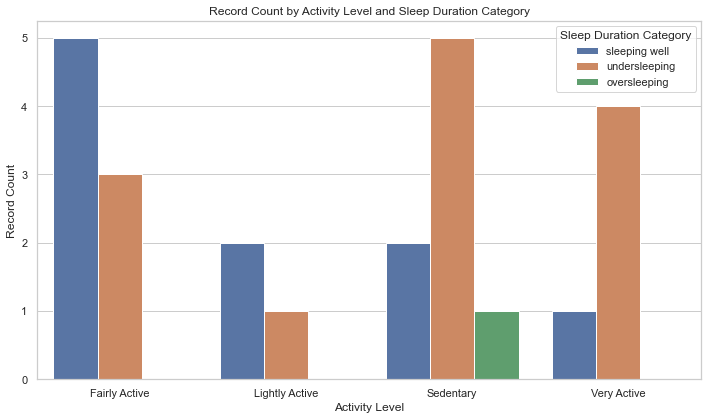

In [60]:
# Set plot style
sns.set(style="whitegrid")

# Plot count of combinations
plt.figure(figsize=(10, 6))
sns.barplot(data=user_profiles_sleep_quantity_summary, x='activity_level', hue='sleepingHours_category', y= 'Id')

# Titles and labels
plt.title('Record Count by Activity Level and Sleep Duration Category')
plt.xlabel('Activity Level')
plt.ylabel('Record Count')
plt.legend(title='Sleep Duration Category')
plt.tight_layout()

plt.show()

* Sedentary users are the most likely to undersleep, though a few oversleep as well.
* Fairly and lightly active users mostly sleep well.
* Very active users surprisingly tend toward undersleeping.

There is no strong or consistent relationship between a user's average activity level and sleep quality (either by efficiency or duration). Therefore, Activity level alone is not a strong predictor of sleep quality.

Now, we turn to hourly intensity data to investigate whether the time of day users are most active could influence their sleep behaviors. 

### 4.7. Relationship Between Time of Peak Activity and Sleep Quality

After observing no strong correlation between overall activity level and sleep quality, we explored whether the time of peak physical activity within the day could affect sleep behaviors.

To do this, we analyzed the hourly intensity data, matched it with daily sleep records, and categorized users based on the part of the day when their highest intensity occurred.

**Categorizing Time of Day** <br>
Each hour was categorized into one of four time ranges:

* Morning: 05:00–11:59
* Afternoon: 12:00–16:59
* Evening: 17:00–20:59
* Night: 21:00–04:59

In [61]:
# Define conditions
conditions = [
    (df_hourlyIntensities['hour'] >= 5) & (df_hourlyIntensities['hour'] < 12),
    (df_hourlyIntensities['hour'] >= 12) & (df_hourlyIntensities['hour'] < 17),
    (df_hourlyIntensities['hour'] >= 17) & (df_hourlyIntensities['hour'] < 21),
    (df_hourlyIntensities['hour'] >= 21) | (df_hourlyIntensities['hour'] < 5)
]

# Define corresponding labels
labels = ['Morning', 'Afternoon', 'Evening', 'Night']

df_hourlyIntensities['part_of_day'] = np.select(conditions, labels)

df_hourlyIntensities = df_hourlyIntensities.merge(df_sleepDay, how = 'inner', on = ['Id', 'Date'])

# Convert TotalMinutesAsleep to TotalHoursAsleep
df_hourlyIntensities['TotalHoursAsleep'] = (df_hourlyIntensities['TotalMinutesAsleep']/60).astype(int)

In [62]:
df_hourlyIntensities.head()

,Id,Date,TotalIntensity,AverageIntensity,Time,hour,part_of_day,TotalMinutesAsleep,TotalTimeInBed,sleepEfficiency,TotalHoursAsleep
0,1927972279,2016-04-12,0,0.000000,00:00:00,0,Night,750,775,0.967742,12
1,1927972279,2016-04-12,0,0.000000,01:00:00,1,Night,750,775,0.967742,12
2,1927972279,2016-04-12,0,0.000000,02:00:00,2,Night,750,775,0.967742,12
3,1927972279,2016-04-12,0,0.000000,03:00:00,3,Night,750,775,0.967742,12
4,1927972279,2016-04-12,1,0.016667,04:00:00,4,Night,750,775,0.967742,12


In [63]:
# Identify the peak intensity for each user per day
df_user_max_intensity = df_hourlyIntensities.groupby(['Id', 'Date'])['TotalIntensity'].max().reset_index()

In [64]:
# Merge back with df_user_max_intensity to get the timeframe when the user's activity was most intense.
df_user_max_intensity = df_user_max_intensity.merge(df_hourlyIntensities[['Id', 'Date', 'TotalIntensity', 'Time', 'TotalHoursAsleep', 'sleepEfficiency', 'part_of_day']], \
                                                    how = 'inner', on = ['Id', 'Date', 'TotalIntensity'])

In [65]:
# Categorize sleep quality based on a threshold of 85% efficient.
df_user_max_intensity['sleepEfficiency_category'] = np.where(df_user_max_intensity['sleepEfficiency'] < 0.85, 'low sleep efficiency', 'good sleep efficiency')

# Sleeping 7-9 hours is considered healthy. 
col = 'TotalHoursAsleep'
conditions = [df_user_max_intensity[col] < 7, \
              (df_user_max_intensity[col] >= 7) & (df_user_max_intensity[col] <= 9), 
              df_user_max_intensity[col] > 9\
             ]
label = ['undersleeping', 'sleeping well', 'oversleeping']

df_user_max_intensity['sleepingHours_category'] = np.select(conditions, label)

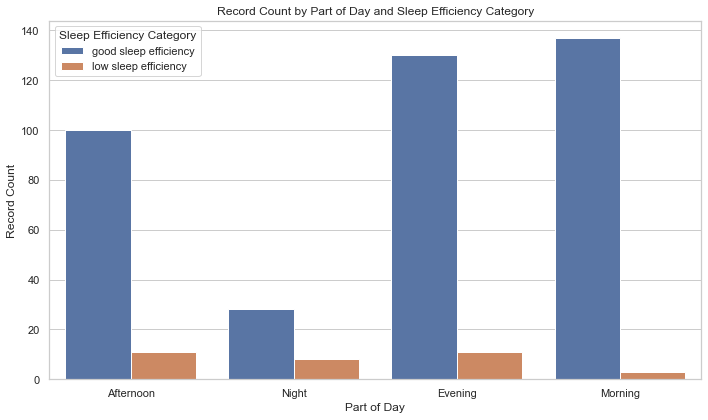

In [66]:
# Set plot style
sns.set(style="whitegrid")

# Plot count of combinations
plt.figure(figsize=(10, 6))
sns.countplot(data=df_user_max_intensity, x='part_of_day', hue='sleepEfficiency_category')

# Titles and labels
plt.title('Record Count by Part of Day and Sleep Efficiency Category')
plt.xlabel('Part of Day')
plt.ylabel('Record Count')
plt.legend(title='Sleep Efficiency Category')
plt.tight_layout()

plt.show()

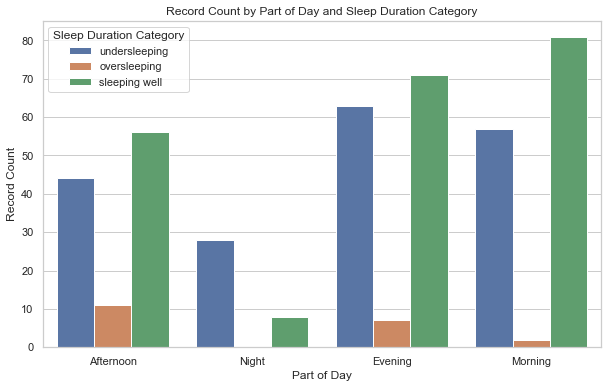

In [67]:
# Set plot style
sns.set(style="whitegrid")

# Plot count of combinations
plt.figure(figsize=(10, 6))
sns.countplot(data=df_user_max_intensity, x='part_of_day', hue='sleepingHours_category')

# Titles and labels
plt.title('Record Count by Part of Day and Sleep Duration Category')
plt.xlabel('Part of Day')
plt.ylabel('Record Count')
plt.legend(title='Sleep Duration Category')


plt.show()

It shows being most active in the morning appears to be associated with better sleep outcomes:

Morning-active users have the highest proportion of good sleep efficiency (137 out of 140 = 98%).
They also show fewer cases of oversleeping or severe undersleeping than evening or night-active users.
Also, afternoon and evening activity also correlate with high sleep efficiency — just not as strongly as morning.
Night activity appears least beneficial for sleep quality.

So, timing of physical activity, particularly morning movement, may be an influential factor in improving sleep quality.

## 5. Conclusion & Strategic Recommendations
Based on the analysis of smart device usage data, several key trends emerged that can inform Bellabeat’s product development and marketing strategies.

**1. Trends in Smart Device Usage** <br>
- Majority of users engage moderately with apps: <br>
Most users (30 out of 35) fall under the medium usage category—indicating frequent but not daily engagement. Only 3 are heavy users, and 2 are light users.


- Users are generally wearing their devices throughout the day:<br>
The majority wear their device for more than half the day, with a significant portion wearing it all day. This suggests users trust their devices to passively collect data.


- Weak correlation between wear time and app use: <br>
Some users wear their devices consistently but rarely open the app, indicating a missed opportunity to convert passive engagement into active interaction.


- Manual weight logging dominates: <br>
Most users log their weight manually and do so only once or sporadically. This may signal friction in setup or low perceived value in ongoing tracking.


- Morning activity is associated with better sleep: <br>
Users most active in the morning show the highest rates of good sleep efficiency (98%) and more balanced sleep duration.
In contrast, users most active at night show the weakest sleep outcomes. This suggests that timing of physical activity, especially in the morning, may positively influence sleep quality.



**2. Implications for Bellabeat Customers** <br>
These patterns suggest that Bellabeat users are likely open to passive tracking and casual engagement, but often don’t take the next step toward full commitment. Many may lack awareness of features like automatic weight syncing or don’t yet perceive the benefit of continuous use.

**3. Strategic Recommendations for Bellabeat** <br>
- Convert Medium Users into Heavy Users <br>
Analyze what features keep medium users engaged and introduce habit-forming incentives, like streaks, badges, or social sharing.


- Send reminders based on behavioral patterns to increase users' engagement with the app.


- Target users with high wear but low app activity through A/B-tested re-engagement strategies. These users are primed for activation.


- Improve Weight Tracking Setup <br>
Conduct user surveys to check users' knowledge on the feature and how they feel about it. <br>
Educate users about automatic syncing or integrate more smart scale partnerships.


- Promote Morning Activity for Better Sleep <br>
Leverage insights showing morning activity is linked to better sleep efficiency. <br>
Introduce wellness challenges or app content encouraging morning movement. <br>
Suggest optimal times for workouts or walks based on sleep trends collected passively by the device.